## Cable Stay Tensioning Calculation

In [2]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [3]:
# Initial data

Zk=1061  #kN
dv=15.9796  #mm
theta=36.53 #degree
lk = 51300.47 #mm
Xik =45.303 #mm
KO = Xik/Zk #mm/kN
Eu = 195000 #MPa
Au = 140 #mm^2
nos = 12



# Display the value of x_k using Markdown syntax
display(Markdown("### Cable Data Input"))
display(Markdown(rf" - Designated jacking force,  $Z_k$ is {Zk} kN"))
display(Markdown(rf"- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is {Xik} mm."))
display(Markdown(rf"- Cable shortening to force ratio, $K_0$ is {KO} mm/kN."))
display(Markdown(rf"- Cable modulus of elasticity, $E_u$ is {Eu} MPa."))
display(Markdown(rf"- Cable section area, $A_u$ is {Au} $mm^2$."))
display(Markdown(rf"- Number of strand , {nos} strand."))


### Cable Data Input

 - Designated jacking force,  $Z_k$ is 1061 kN

- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is 45.303 mm.

- Cable shortening to force ratio, $K_0$ is 0.042698397737983035 mm/kN.

- Cable modulus of elasticity, $E_u$ is 195000 MPa.

- Cable section area, $A_u$ is 140 $mm^2$.

- Number of strand , 12 strand.

In [4]:
def force_drop(strand, strand_jacking_load,current_length,total_shortening, total_force):
    current_length=lk-total_shortening
    strain_force_ratio=KO*Eu*Au/(current_length*1000)
    strand_shortening=KO*strand_jacking_load/(1+(strand-1)*strain_force_ratio)
    total_shortening=strand_shortening+total_shortening
    total_force=strand_jacking_load/(1+(strand-1)*strain_force_ratio)+total_force

    return strain_force_ratio, strand_shortening,total_shortening, current_length, total_force

def cycle_load_reading(final_shortening,total_shortening,strand_jacking_load):
    strand_partial_shortening=final_shortening-total_shortening
    drop_force=strand_partial_shortening*Eu*Au/(lk-total_shortening)/1000
    reduced_force=strand_jacking_load-drop_force

    return strand_partial_shortening, drop_force, reduced_force

def perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads):

    # Initialize lists to compile results

    strain_force_ratio_list = []
    strand_shortening_list = []
    total_shortening_list = []
    current_length_list = []
    total_force_list = []

    #Calculation of accumulated shortening and total force
    for strand in range(1,len(strand_jacking_loads)+1):
        # Access the jacking load for the current strand index
        strand_jacking_load = strand_jacking_loads[strand - 1]
    
        # Perform force drop calculation for the current strand
        strain_force_ratio, strand_shortening, total_shortening, current_length,    total_force = force_drop(
            strand, strand_jacking_load, current_length, total_shortening,  total_force
        )
        
        # Append results to lists
        strain_force_ratio_list.append(strain_force_ratio)
        strand_shortening_list.append(strand_shortening)
        total_shortening_list.append(total_shortening)
        current_length_list.append(current_length)
        total_force_list.append(total_force)
    
    # print(len(total_shortening_list))
    strand_partial_shortening_list = []
    drop_force_list = []
    reduced_force_list = []

    #Colculating Drop Force and Residual Force
    for strand in range(1,len(initial_jacking_loads)+1):
        #Access the final shortening
        final_shortening=total_shortening_list[-1]

        #Access the total shortening list and strand jacking load 
        total_shortening=total_shortening_list[strand- 1]
        strand_jacking_load=initial_jacking_loads[strand - 1]

        strand_partial_shortening, drop_force, reduced_force = cycle_load_reading(final_shortening,total_shortening,strand_jacking_load) 

        #append result to List 
        strand_partial_shortening_list.append(strand_partial_shortening)
        drop_force_list.append(drop_force)
        reduced_force_list.append(reduced_force)

    return drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list

def tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads):

    accumulated_load_list=initial_jacking_loads.copy()
    table_data=[]
   
    for i in range(cycle_number):
        drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list=perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads)

        #Extracting previous tension result for the next tensioning cycle
        strand_jacking_loads = drop_force_list
        current_length=current_length_list[-1]
        total_shortening=total_shortening_list[-1]
        total_force=total_force_list[-1]

        #Upddating accumulated load list
        for j in range(len(accumulated_load_list)):
            accumulated_load_list[j] += drop_force_list[j]

        # Add data to the table
        table_data.append([i+1] + reduced_force_list)

    return reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data



    

#### Multi Cycle Iteration 

[88.41192441146613, 88.41377482778206, 88.41500271685598, 88.41577950842256, 88.41624066516896, 88.41649121000984, 88.41661042359515, 88.41665584250167, 88.41666666666667, 88.41666666666667, 88.41666666666667, 88.41666666666667]
[0.004742255200534093, 0.002891838884609537, 0.0016639498106976768, 0.0008871582441149136, 0.0004260014977127296, 0.00017545665683630992, 5.624307152036572e-05, 1.0824165009393622e-05, 0.0, 0.0, 0.0, 0.0]
[51255.182453598056, 51255.17740908349, 51255.1739349653, 51255.17162962933, 51255.17017121958, 51255.169305407566, 51255.168835014956, 51255.168611193985, 51255.168525920955, 51255.16850559881, 51255.16850559881, 51255.16850559881]
[45.29259091651081, 45.296065034701286, 45.29837037066803, 45.29982878042479, 45.30069459243509, 45.301164985047556, 45.30138880601662, 45.30147407904637, 45.30149440118563, 45.30149440118563, 45.30149440118563, 45.30149440118563]
[110.02741098389048, 107.63685964767922, 105.34776223806702, 103.15379906870625, 101.04916245894532, 9

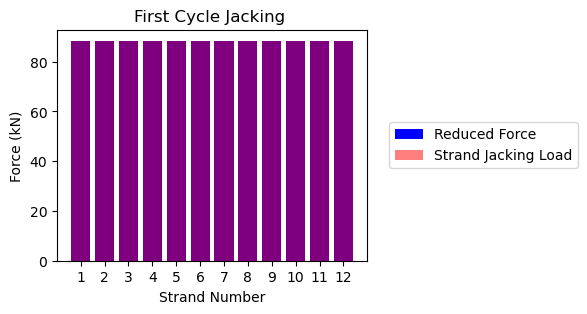

In [5]:
# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
initial_jacking_loads = [strand_tensioning] * nos
strand_jacking_loads=initial_jacking_loads

#initial input
current_length=lk
total_shortening=0
total_force=0
cycle_number = 4

# drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list= perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force)

# print(current_length_list)
# print(drop_force_list)
# print(total_shortening_list)
# print(total_force_list)
# print(reduced_force_list)


reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data=tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads)

print(reduced_force_list)
print(drop_force_list)
print(current_length_list)
print(total_shortening_list)
print(accumulated_load_list)
print(initial_jacking_loads)

# print(table_data)
#Calculating Force Distribution Factor 
gamma_xi=total_shortening_list[-1]/Xik
print(f"{gamma_xi*100:.2f}%")



# #================ TABLE DATA ==================================
# # Extracting data
# column_labels = ['Strand'] + [f'Cycle {i}' for i in range(1, len(table_data[0]) + 1)]
# row_labels = [entry[0] for entry in table_data]
# cell_values = [entry[1:] for entry in table_data]

# # Create table
# plt.figure(figsize=(10, 6))
# table = plt.table(cellText=cell_values, rowLabels=row_labels, colLabels=column_labels, loc='center')


# # Formatting
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1.5, 1.5)

# plt.axis('off')
# plt.show()

# ================ PLOTTING GRAPH ==============================

# Generate x-axis values (strand numbers)
strand_numbers = list(range(1, len(reduced_force_list) + 1))

# Set the style to a dark theme
# plt.style.use('dark_background')
plt.style.use('default')

# Set the desired figure size
plt.figure(figsize=(4, 3))  # Adjust width and height as needed

# Create bar chart
plt.bar(strand_numbers, reduced_force_list, label='Reduced Force', color='blue', alpha=1)
plt.bar(strand_numbers, initial_jacking_loads, label='Strand Jacking Load', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Strand Number')
plt.ylabel('Force (kN)')
plt.title('First Cycle Jacking ')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set tick positions and labels for x-axis
plt.xticks(strand_numbers, strand_numbers)

# Show plot

plt.show()


### Single Cycle Trial

[88.41778414275103, 88.41718488311818, 88.41675211390537, 88.4164595159145, 88.41628271907247, 88.41619938063103, 88.41618921421859, 88.41623398125523, 88.41631745393282, 88.41642535709829, 88.41654529487748, 88.41666666666667]
[21.609626841139452, 19.219674764561034, 16.931010124161638, 14.737339552791752, 12.632879739872852, 10.61230688457702, 8.67071202780971, 6.803561482445154, 5.006661697242082, 3.2761279868495827, 1.6083566416885582, 0.0]
[51300.47, 51295.77200584373, 51291.27820341713, 51286.97558867725, 51282.85223716535, 51278.89719448391, 51275.10037980686, 51271.45250065348, 51267.94497742461, 51264.56987642437, 51261.31985027706, 51258.1880848061]
[4.697994156270679, 9.191796582869758, 13.494411322751453, 17.61776283464791, 21.57280551609602, 25.369620193136917, 29.017499346518303, 32.52502257538888, 35.90012357563208, 39.150149722941364, 42.28191519390186, 45.30174842639707]
[131.63703782502992, 126.85653441224025, 122.27877236222866, 117.891138621498, 113.68204219881817, 

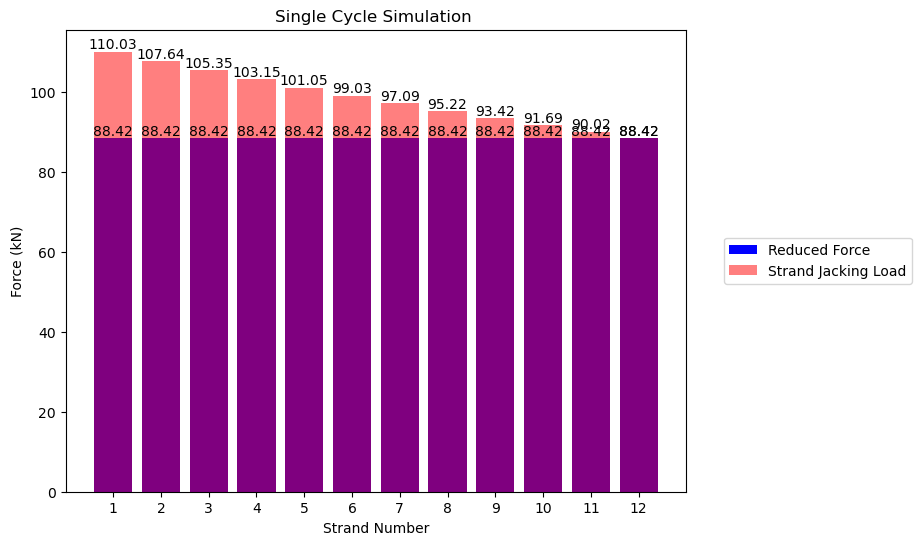

In [6]:
# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
initial_jacking_loads = accumulated_load_list
strand_jacking_loads=initial_jacking_loads

#initial input
current_length=lk
total_shortening=0
total_force=0
cycle_number = 1

# drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list= perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force)

# print(current_length_list)
# print(drop_force_list)
# print(total_shortening_list)
# print(total_force_list)
# print(reduced_force_list)


reduced_force_list,drop_force_list,current_length_list, total_shortening_list,accumulated_load_list,table_data=tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads)

print(reduced_force_list)
print(drop_force_list)
print(current_length_list)
print(total_shortening_list)
print(accumulated_load_list)
print(initial_jacking_loads)

#Calculating Force Distribution Factor 
gamma_xi=total_shortening_list[-1]/Xik
print(f"{gamma_xi*100:.2f}%")

# ================ PLOTTING GRAPH ==============================

# Generate x-axis values (strand numbers)
strand_numbers = list(range(1, len(reduced_force_list) + 1))

# Set the style to a dark theme
# plt.style.use('dark_background')
plt.style.use('default')

# Set the desired figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# Create bar chart
plt.bar(strand_numbers, reduced_force_list, label='Reduced Force', color='blue', alpha=1)
plt.bar(strand_numbers, initial_jacking_loads, label='Strand Jacking Load', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Strand Number')
plt.ylabel('Force (kN)')
plt.title('Single Cycle Simulation ')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set tick positions and labels for x-axis
plt.xticks(strand_numbers, strand_numbers)

# Display values on top of each bar
for i in range(len(reduced_force_list)):
    plt.text(strand_numbers[i], reduced_force_list[i], f'{reduced_force_list[i]:.2f}', ha='center', va='bottom')

for i in range(len(initial_jacking_loads)):
    plt.text(strand_numbers[i], initial_jacking_loads[i], f'{initial_jacking_loads[i]:.2f}', ha='center', va='bottom')



# Show plot

plt.show()


In [7]:
# Display the value of x_k using Markdown syntax
display(Markdown("### First cycle of strand tensioning"))
display(Markdown(rf" - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{{k,i-1}}$"))
display(Markdown(rf" - Strain to force ratio, $\eta_i = \dfrac{{K_0 \cdot E_u \cdot A_u}}{{l_{{k,i}}}}$"))



### First cycle of strand tensioning

 - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{k,i-1}$

 - Strain to force ratio, $\eta_i = \dfrac{K_0 \cdot E_u \cdot A_u}{l_{k,i}}$